<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Load the dataset into a dataframe.


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.tail()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat less welcome now than last year,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11397,25142,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","A natural science (ex. biology, chemistry, phy...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,30.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<function matplotlib.pyplot.show(*args, **kw)>

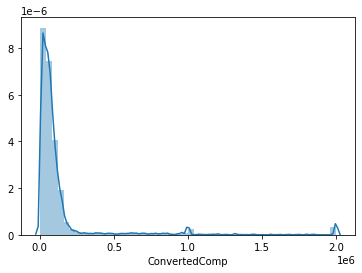

In [8]:
# your code goes here
sns.distplot(df['ConvertedComp'])
plt.show

Plot the histogram for the column `ConvertedComp`.


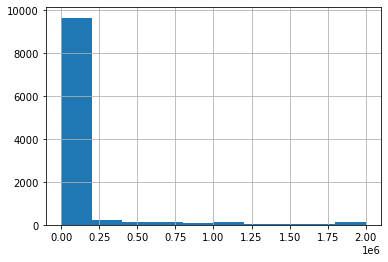

In [17]:
# your code goes here
hist = df['ConvertedComp'].hist()


What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# your code goes here
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [14]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


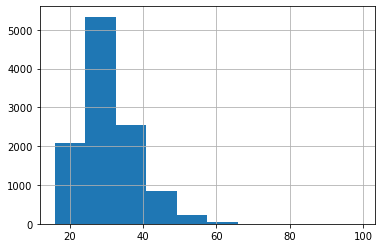

In [16]:
# your code goes here
age_hist = df['Age'].hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


57745.0

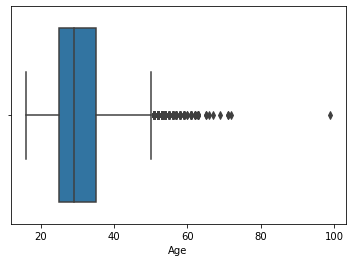

In [61]:
# your code goes here
sns.boxplot(df['Age'])
df['ConvertedComp'].median()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [27]:
# your code goes here
iqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25),
                                                      df['ConvertedComp'].quantile(.75), inclusive=True)]
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)
mask = df['ConvertedComp'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'ConvertedComp']
iqr_q3_q1 = q3 - q1
print(iqr)
print('The IQR for the q1 and q3:', iqr_q3_q1)

0        61000.0
1        95179.0
2        90000.0
4        65277.0
5        31140.0
          ...   
11386    47724.0
11387    39180.0
11389    35518.0
11391    68748.0
11396    80371.0
Name: ConvertedComp, Length: 5380, dtype: float64
The IQR for the q1 and q3: 73132.0


Find out the upper and lower bounds.


In [28]:
# your code goes here
lower_bound = q1 - (1.5 * iqr_q3_q1)
upper_bound = q3 + (1.5 * iqr_q3_q1)
print(lower_bound)
print(upper_bound)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [49]:
# your code goes here
(df['ConvertedComp'] < lower_bound).sum()
(df['ConvertedComp'] > upper_bound).sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [66]:
# your code goes here
df1 = df['ConvertedComp'].clip(upper_bound, lower_bound)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [68]:
# your code goes here
df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
